# 911 Calls

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()


sns.set_style('white')
sns.set_context('notebook', font_scale=1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
df = pd.read_csv('911.csv')

FileNotFoundError: File b'911.csv' does not exist

In [ ]:
df.info()

In [ ]:
df.head()

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [ ]:
df['zip'].value_counts().nlargest(5)

** What are the top 5 townships (twp) for 911 calls? **

In [ ]:
df['twp'].value_counts().nlargest(5)

** Take a look at the 'title' column, how many unique title codes are there? **

In [ ]:
df['title'].nunique()

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.**

** Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

** What is the most common Reason for a 911 call based off of this new column? **

In [41]:
df['Reason'] = df['title'].apply(lambda s:s.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

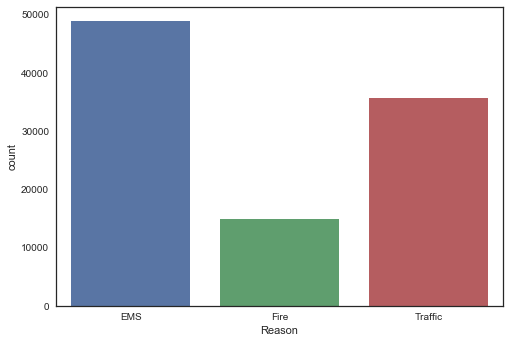

In [61]:
sns.countplot(x=df['Reason'], data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [44]:
type(df.timeStamp.iloc[0])

pandas._libs.tslib.Timestamp

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [43]:
df.timeStamp = pd.to_datetime(df.timeStamp)

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [52]:
df['Hour'] = df.timeStamp.apply(lambda s:s.hour)
df['Month'] = df.timeStamp.apply(lambda s:s.month)
df['Day of Week'] = df.timeStamp.apply(lambda s:s.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [55]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

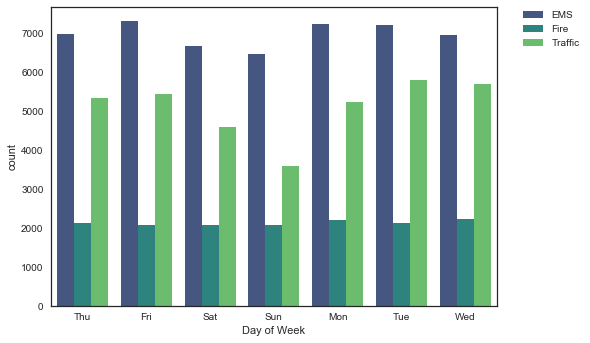

In [64]:
sns.countplot(x='Day of Week', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

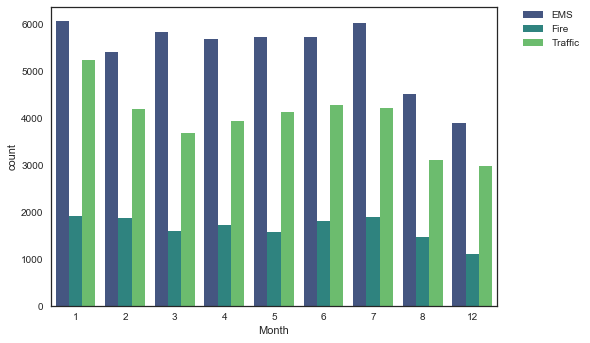

In [65]:
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [68]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

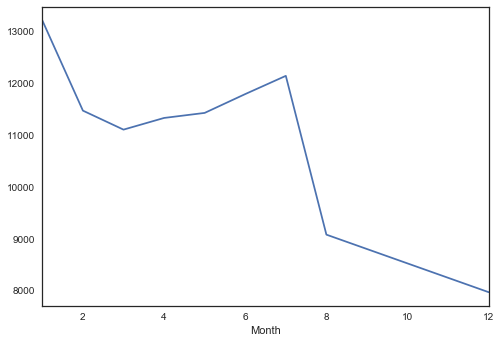

In [75]:
byMonth['lat'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

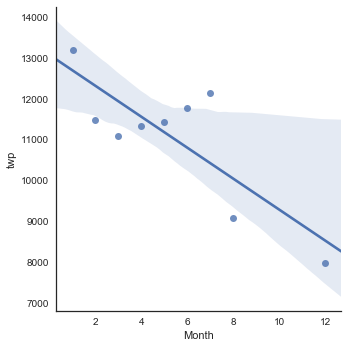

In [76]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [82]:
df['Date'] = df['timeStamp'].apply(lambda ts:ts.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [113]:
df.groupby('Date').count().iplot()

In [100]:
df.groupby('Date')['lat'].count().values

array([115, 396, 403, 319, 447, 421, 377, 388, 346, 279, 271, 430, 448,
       524, 445, 323, 296, 317, 380, 365, 361, 318, 263, 335, 324, 402,
       448, 434, 385, 359, 365, 406, 417, 588, 430, 399, 440, 327, 285,
       333, 432, 395, 364, 486, 913, 662, 575, 505, 441, 436, 422, 351,
       283, 374, 471, 433, 366, 402, 350, 255, 363, 380, 413, 439, 384,
       328, 344, 541, 560, 378, 344, 399, 376, 300, 343, 342, 679, 447,
       396, 387, 330, 343, 407, 401, 368, 368, 297, 286, 381, 407, 396,
       406, 384, 350, 304, 384, 382, 359, 412, 418, 306, 244, 368, 303,
       365, 350, 355, 313, 268, 402, 385, 368, 364, 456, 386, 586, 409,
       334, 391, 396, 370, 302, 281, 381, 264, 385, 360, 393, 377, 309,
       390, 416, 405, 404, 384, 363, 312, 418, 416, 336, 441, 355, 306,
       140, 343, 361, 342, 362, 415, 369, 332, 357, 378, 404, 393, 466,
       359, 263, 386, 395, 348, 377, 420, 334, 316, 398, 365, 444, 458,
       429, 382, 373, 295, 419, 441, 406, 431, 356, 307, 435, 43

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [108]:
# df[df.Reason == 'EMS'].groupby('Date')['lat'].count().iplot()
# trace1 = go.Scatter(x=df.groupby['Date'].count())
trace0 = go.Scatter(
    x = df.groupby('Date')['lat'].count().index,
    y = df.groupby('Date')['lat'].count().values,
    mode = 'lines',
    name = 'lines'
)
data = [trace0]
py.iplot(data)

PlotlyRequestError: Uh oh, an error occurred on the server. 

In [109]:
df[df.Reason == 'EMS'].groupby('Date')['lat'].count().iplot()

In [110]:
df[df.Reason == 'Fire'].groupby('Date')['lat'].count().iplot()

In [111]:
df[df.Reason == 'Traffic'].groupby('Date')['lat'].count().iplot()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [133]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

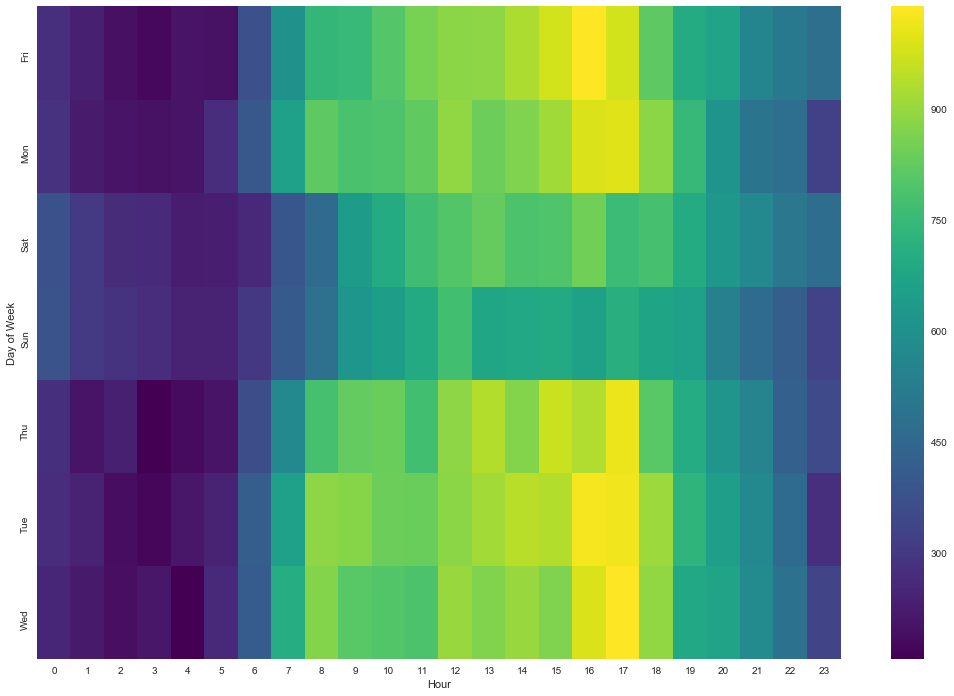

In [129]:
plt.figure(figsize=(18,12))
sns.heatmap(dayHour, cmap='viridis')

** Now create a clustermap using this DataFrame. **

C:\Users\mlieb\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



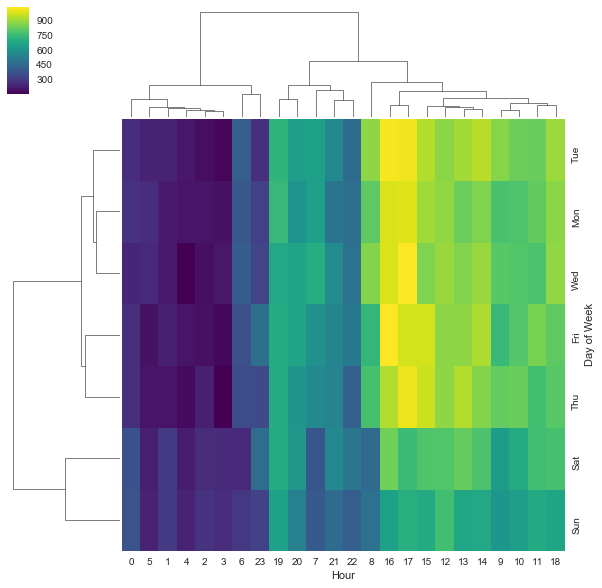

In [132]:
sns.clustermap(dayHour, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [134]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


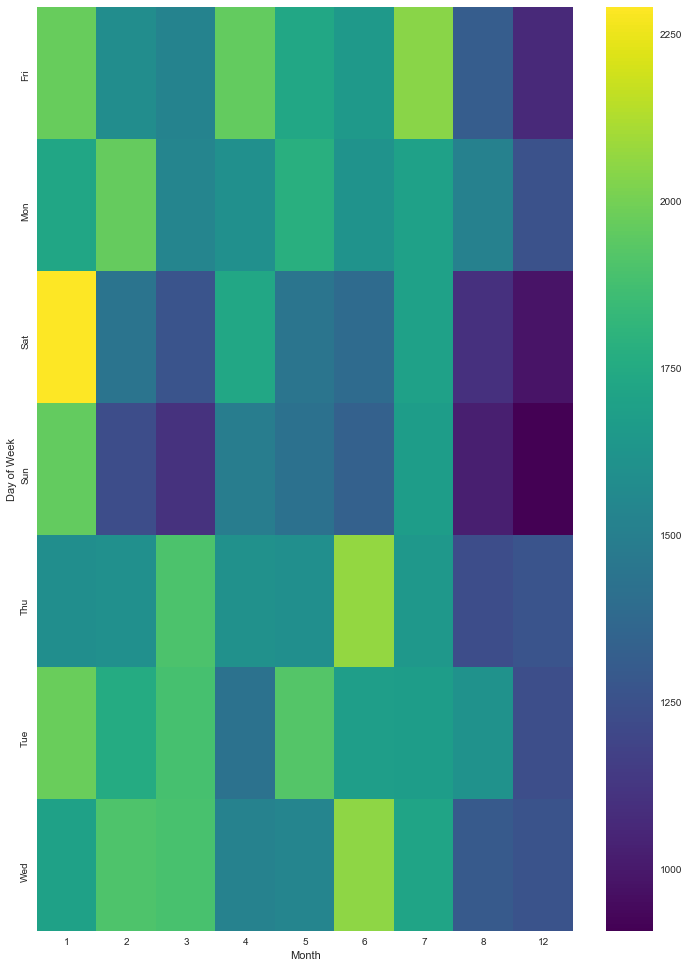

In [137]:
plt.figure(figsize=(12,17))
sns.heatmap(dayMonth, cmap='viridis')

C:\Users\mlieb\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



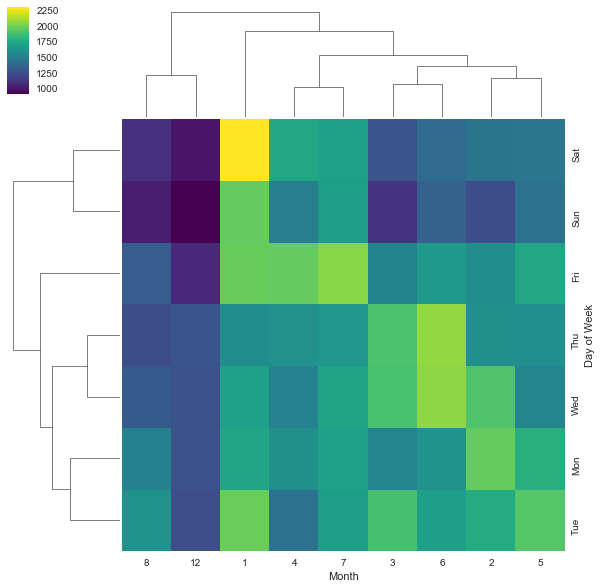

In [135]:
sns.clustermap(dayMonth, cmap='viridis')